In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


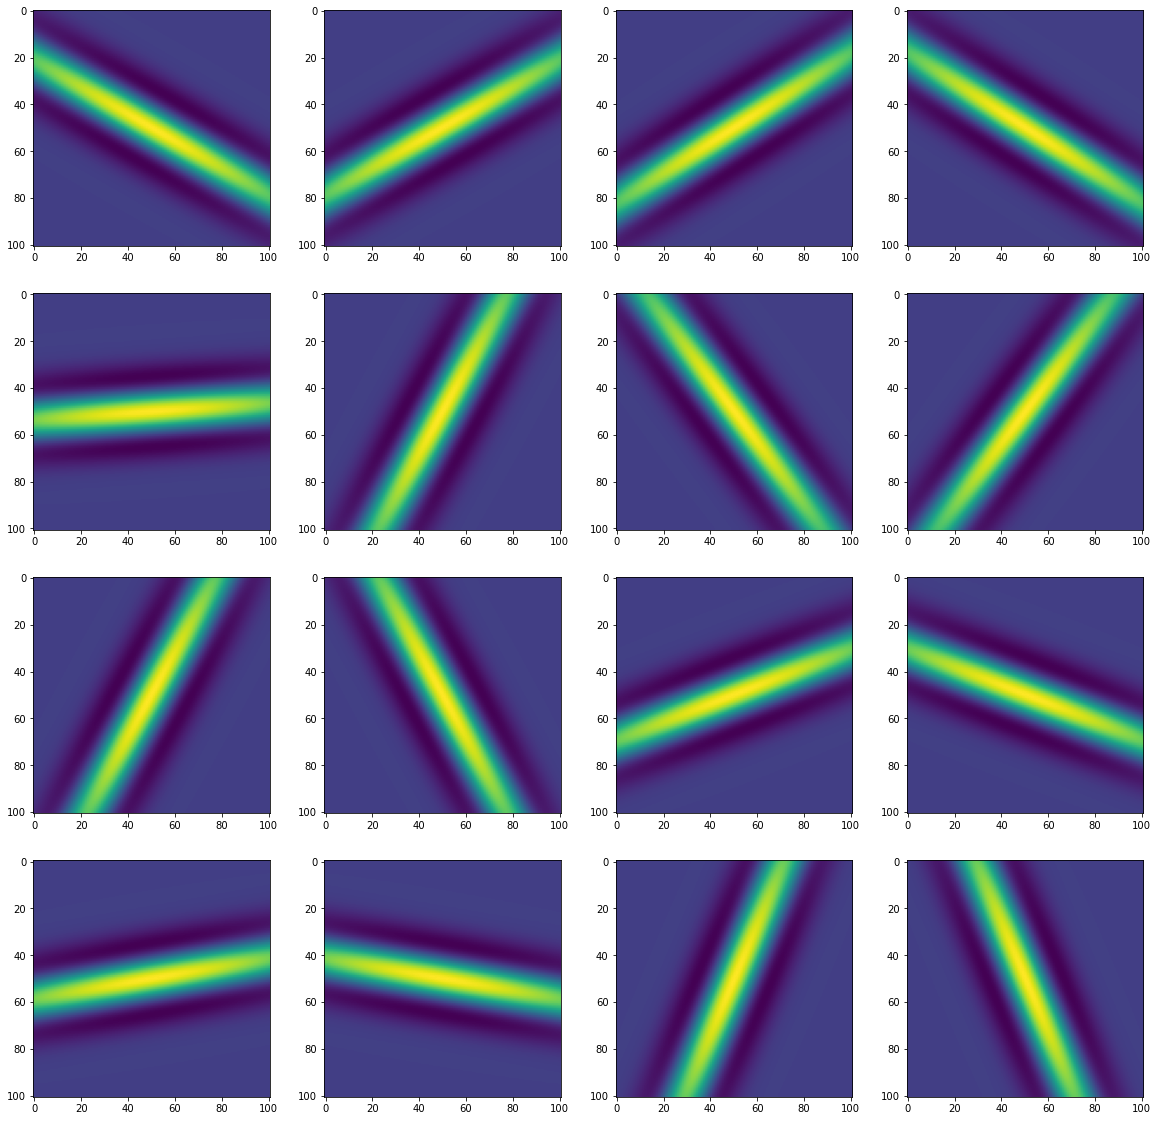

In [21]:
# Filter bank creation
ksize  = 100
sigma = 10
theta = 2*np.pi/3
lamda = 40# 5*np.pi/4
# aspect ratio
gamma = 0.15
phi = 0

kernel = [
    cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -theta, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 1, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -1, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 1.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 0.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 2.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -2.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 0.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -0.5, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 1.2, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -1.2, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 1.4, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -1.4, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, 0.4, lamda, gamma, phi, ktype=cv2.CV_32F),
    cv2.getGaborKernel((ksize, ksize), sigma, -0.4, lamda, gamma, phi, ktype=cv2.CV_32F),
]
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
k = 0
for j in range(4):
    for i in range(4):  
        ax[j][i].imshow(kernel[k])
        k+=1
    

In [4]:
img = cv2.imread('BSE_Image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = np.zeros_like(img)
for k in kernel:
    fimg += cv2.filter2D(img, cv2.CV_8UC3, k)
    kernel_resized = cv2.resize(k, (400, 400))
    
cv2.imshow('Original image', img)
cv2.imshow('Filtered image', fimg)
#cv2.imshow('Kernel', kernel_resized)
cv2.waitKey()
cv2.destroyAllWindows()
    

In [20]:
img = cv2.imread('synthetic.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = np.zeros_like(img)
for k in kernel:
    fimg += cv2.filter2D(img, cv2.CV_8UC3, k)
    kernel_resized = cv2.resize(k, (400, 400))
cv2.imshow('Original image', img)
cv2.imshow('Filtered image', fimg)
#cv2.imshow('Kernel', kernel_resized)
cv2.waitKey()
cv2.destroyAllWindows()
    

In [19]:
img = cv2.imread('people.jpg')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (int(img.shape[0]/2), int(img.shape[1]/2)))

fimg = np.zeros_like(img)
for k in kernel:
    fimg += cv2.filter2D(img, cv2.CV_8UC3, k)
    kernel_resized = cv2.resize(k, (400, 400))
cv2.resizeWindow('image', 200,200)
cv2.imshow('Result', np.concatenate((img, fimg), axis=1))


cv2.waitKey()
cv2.destroyAllWindows()